In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, regularizers

In [2]:
input1 = keras.Input(shape=(256,), name="VBF")
input2 = keras.Input(shape=(256,), name="ggF")

dense = layers.Dense(
            256, 
            activation="relu", 
            kernel_regularizer=regularizers.l2(0.01))
VBF_input = dense(input1)
VBF_input = layers.Dropout(rate=0.01)(VBF_input)
VBF_input = layers.Dense(128, activation="relu")(VBF_input)
VBF_input = layers.Dense(64, activation="relu")(VBF_input)
VBF_input = layers.Dense(32, activation="relu")(VBF_input)
VBF_input = layers.Dense(24, activation="relu")(VBF_input)
VBF_input = layers.Dropout(rate=0.01)(VBF_input)
VBF_input = layers.Dense(16, activation="relu")(VBF_input)
VBF_input = layers.Dense(8, activation="relu")(VBF_input)


dense = layers.Dense(
            256, 
            activation="relu", 
            kernel_regularizer=regularizers.l2(0.01))
ggF_input = dense(input2)
ggF_input = layers.Dropout(rate=0.01)(ggF_input)
ggF_input = layers.Dense(128, activation="relu")(ggF_input)
ggF_input = layers.Dense(64, activation="relu")(ggF_input)
ggF_input = layers.Dense(32, activation="relu")(ggF_input)
ggF_input = layers.Dense(24, activation="relu")(ggF_input)
ggF_input = layers.Dropout(rate=0.01)(ggF_input)
ggF_input = layers.Dense(16, activation="relu")(ggF_input)
ggF_input = layers.Dense(8, activation="relu")(ggF_input)


x = layers.concatenate([VBF_input, ggF_input])
out1 = layers.Dense(1, activation="sigmoid", name="VBFoutput")(x)
out2 = layers.Dense(1, activation="sigmoid", name="ggFoutput")(x)
model = keras.Model(inputs=[input1, input2], outputs=[out1, out2], name="model")
model.summary()

model.compile(
    loss = keras.losses.LogCosh(reduction="auto", name="log_cosh"),
    optimizer = keras.optimizers.Adagrad(
        learning_rate=0.001,
        initial_accumulator_value=0.1,
        epsilon=1e-07,
        name="Adagrad"),
    metrics = [metrics.binary_accuracy]
    )


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
VBF (InputLayer)                [(None, 256)]        0                                            
__________________________________________________________________________________________________
ggF (InputLayer)                [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          65792       VBF[0][0]                        
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 256)          65792       ggF[0][0]                        
______________________________________________________________________________________________

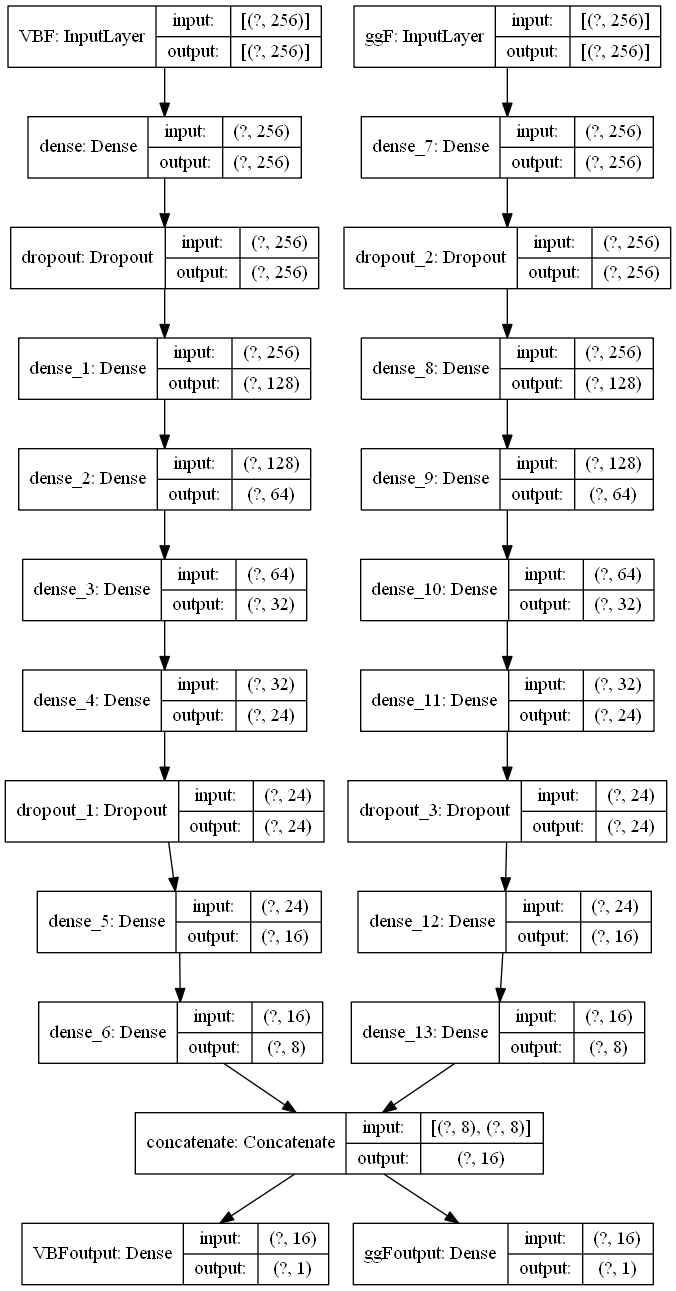

In [3]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [4]:
input1 = keras.Input(shape=(256,), name="VBF")
input2 = keras.Input(shape=(256,), name="ggF")
x = layers.concatenate([input1, input2])
x = layers.Dense(
            256, 
            activation="relu", 
            kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(rate=0.01)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(24, activation="relu")(x)
x = layers.Dropout(rate=0.01)(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(8, activation="relu")(x)



out1 = layers.Dense(1, activation="sigmoid", name="VBFoutput")(x)
out2 = layers.Dense(1, activation="sigmoid", name="ggFoutput")(x)
model = keras.Model(inputs=[input1, input2], outputs=[out1, out2], name="model1")
model.summary()

model.compile(
    loss = keras.losses.LogCosh(reduction="auto", name="log_cosh"),
    optimizer = keras.optimizers.Adagrad(
        learning_rate=0.001,
        initial_accumulator_value=0.1,
        epsilon=1e-07,
        name="Adagrad"),
    metrics = [metrics.binary_accuracy]
    )


Model: "model1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
VBF (InputLayer)                [(None, 256)]        0                                            
__________________________________________________________________________________________________
ggF (InputLayer)                [(None, 256)]        0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 512)          0           VBF[0][0]                        
                                                                 ggF[0][0]                        
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 256)          131328      concatenate_1[0][0]         

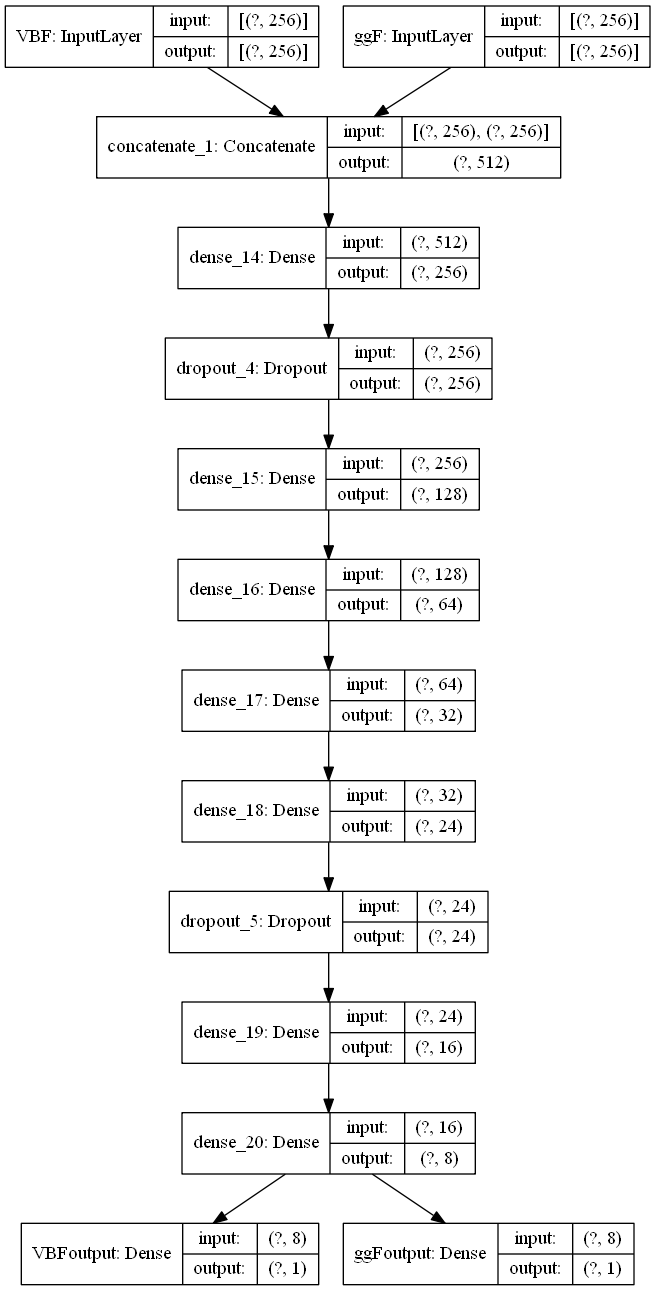

In [5]:
keras.utils.plot_model(model, "model1.png", show_shapes=True)

# Outline
## General Direction
* Multi-input/multi-output DNN
* Multi-class DNN

## Inputs
* Modify SampleHolder to return x_train, y_train for VBF and ggF based on flags
* Two input entry or single input entry? Two inputs would have VBF and ggF x_train, y_train separated
     * if single entry, how to pass the flags into DNN so it know which branch is VBF/ggF
     
## Outputs
* Have a dense output that specifies the quality discrimination
* Could have a softmax single output or two separate sigmoid outputs

In [ ]:
input1 = keras.Input(shape=(256,), name="VBFggF")
dense = layers.Dense(
            256, 
            activation="relu", 
            kernel_regularizer=regularizers.l2(0.01))
VBF_input = dense(input1)
VBF_input = layers.Dropout(rate=0.01)(VBF_input)
VBF_input = layers.Dense(128, activation="relu")(VBF_input)
VBF_input = layers.Dense(64, activation="relu")(VBF_input)
VBF_input = layers.Dense(32, activation="relu")(VBF_input)
VBF_input = layers.Dense(24, activation="relu")(VBF_input)
VBF_input = layers.Dropout(rate=0.01)(VBF_input)
VBF_input = layers.Dense(16, activation="relu")(VBF_input)
VBF_input = layers.Dense(8, activation="relu")(VBF_input)


dense = layers.Dense(
            256, 
            activation="relu", 
            kernel_regularizer=regularizers.l2(0.01))
ggF_input = dense(input2)
ggF_input = layers.Dropout(rate=0.01)(ggF_input)
ggF_input = layers.Dense(128, activation="relu")(ggF_input)
ggF_input = layers.Dense(64, activation="relu")(ggF_input)
ggF_input = layers.Dense(32, activation="relu")(ggF_input)
ggF_input = layers.Dense(24, activation="relu")(ggF_input)
ggF_input = layers.Dropout(rate=0.01)(ggF_input)
ggF_input = layers.Dense(16, activation="relu")(ggF_input)
ggF_input = layers.Dense(8, activation="relu")(ggF_input)


x = layers.concatenate([VBF_input, ggF_input])
out1 = layers.Dense(1, activation="sigmoid", name="VBFoutput")(x)
out2 = layers.Dense(1, activation="sigmoid", name="ggFoutput")(x)
model = keras.Model(inputs=[input1, input2], outputs=[out1, out2], name="model")
model.summary()

model.compile(
    loss = keras.losses.LogCosh(reduction="auto", name="log_cosh"),
    optimizer = keras.optimizers.Adagrad(
        learning_rate=0.001,
        initial_accumulator_value=0.1,
        epsilon=1e-07,
        name="Adagrad"),
    metrics = [metrics.binary_accuracy]
    )
